# YOLO Training Results Analysis

This notebook analyzes the training results from the YOLO11 model trained on the KITTI dataset. It loads the training metrics from the CSV file and creates comprehensive visualizations to understand model performance.

## Dataset Information
- **Results CSV**: `/home/carlier1/Documents/yolo11/runs/detect/kitti_yolo11x/results.csv`
- **Model**: YOLOv11x
- **Dataset**: KITTI (converted to YOLO format)

## Analysis Sections
1. Import libraries and load data
2. Data exploration and preprocessing
3. Training/validation loss visualization
4. mAP metrics analysis
5. Precision/recall curves
6. Comprehensive training dashboard
7. Export plots for documentation

## 1. Import Required Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configure plotting style
# Check available styles if needed
# print("Available styles:", plt.style.available)
plt.style.use('seaborn')  # Use standard seaborn style
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set figure size defaults
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Training Results Data

In [13]:
# Define the path to the results CSV file
results_csv_path = "/home/carlier1/Documents/yolo11/runs/detect/kitti_yolo11x/results.csv"

# Check if file exists
if Path(results_csv_path).exists():
    # Load the CSV file
    df = pd.read_csv(results_csv_path)
    print(f"✓ Successfully loaded training results from: {results_csv_path}")
    print(f"Dataset shape: {df.shape}")
    print(f"Training epochs: {len(df)}")
else:
    print(f"❌ File not found: {results_csv_path}")
    print("Please ensure the YOLO training has been completed and results.csv exists.")
    
# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()

✓ Successfully loaded training results from: /home/carlier1/Documents/yolo11/runs/detect/kitti_yolo11x/results.csv
Dataset shape: (314, 15)
Training epochs: 314

First 5 rows of the dataset:


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,113.818,1.21670,0.99835,1.12890,0.68571,0.38572,0.49293,0.28470,1.18600,0.96001,1.15933,0.067044,0.000333,0.000333
1,2,223.317,1.19284,0.90746,1.12064,0.60303,0.53686,0.58047,0.33147,1.12168,0.81224,1.11726,0.034044,0.000666,0.000666
2,3,331.798,1.13990,0.84864,1.09412,0.71690,0.52181,0.60619,0.36453,1.13285,0.81172,1.14375,0.001044,0.001000,0.001000
3,4,440.024,1.09932,0.79478,1.07445,0.67352,0.59075,0.65458,0.41004,1.00855,0.72267,1.06432,0.001000,0.001000,0.001000
4,5,548.445,1.04930,0.73908,1.05366,0.75747,0.64055,0.71664,0.45907,0.96139,0.64494,1.04548,0.001000,0.001000,0.001000


## 3. Data Exploration and Preprocessing

In [14]:
# Explore the dataset structure
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Display basic statistics
print(f"\nBasic statistics:")
df.describe()

Dataset Info:
Shape: (314, 15)
Columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Data types:
epoch                     int64
time                    float64
train/box_loss          float64
train/cls_loss          float64
train/dfl_loss          float64
metrics/precision(B)    float64
metrics/recall(B)       float64
metrics/mAP50(B)        float64
metrics/mAP50-95(B)     float64
val/box_loss            float64
val/cls_loss            float64
val/dfl_loss            float64
lr/pg0                  float64
lr/pg1                  float64
lr/pg2                  float64
dtype: object

Missing values:
epoch                   0
time                    0
train/box_loss          0
train/cls_loss          0
train/dfl_loss          0
metrics/precision(B)    0
metrics/recall(B)       0
metrics/mAP50(B) 

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,157.500000,20595.981328,0.502303,0.302665,0.846930,0.958830,0.937807,0.966637,0.867141,0.402136,0.240573,0.831155,0.001053,0.000734,0.000734
std,90.788215,12511.492782,0.164969,0.116106,0.056024,0.048102,0.070632,0.056401,0.104946,0.160936,0.107520,0.056996,0.004188,0.000217,0.000217
min,1.000000,113.818000,0.330750,0.200940,0.801080,0.603030,0.385720,0.492930,0.284700,0.278910,0.169800,0.795680,0.000314,0.000314,0.000314
25%,79.250000,8563.477500,0.383505,0.229492,0.811157,0.963747,0.943495,0.975010,0.858720,0.304017,0.183215,0.800915,0.000552,0.000549,0.000549
50%,157.500000,23065.500000,0.451625,0.265995,0.826045,0.975505,0.962415,0.983920,0.909015,0.336010,0.198985,0.807865,0.000779,0.000774,0.000774
75%,235.750000,31630.125000,0.565558,0.330695,0.858745,0.979695,0.968065,0.986623,0.925560,0.430490,0.248032,0.832165,0.000941,0.000938,0.000938
max,314.000000,40136.500000,1.216700,0.998350,1.128900,0.984980,0.974420,0.988370,0.938210,1.186000,0.960010,1.159330,0.067044,0.001000,0.001000


In [15]:
# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# The CSV already contains an 'epoch' column, so we don't need to create it
# df['epoch'] = df.index + 1  # Comment out since epoch column exists

# Define exact column names based on the CSV structure
train_loss_columns = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']
val_loss_columns = ['val/box_loss', 'val/cls_loss', 'val/dfl_loss']
metrics_columns = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
lr_columns = ['lr/pg0', 'lr/pg1', 'lr/pg2']

print("Exact column names from CSV:")
print(f"Available columns: {list(df.columns)}")
print(f"Training loss columns: {train_loss_columns}")
print(f"Validation loss columns: {val_loss_columns}")
print(f"Metrics columns: {metrics_columns}")
print(f"Learning rate columns: {lr_columns}")

# Verify which columns actually exist in the dataframe
existing_columns = {
    'train_loss': [col for col in train_loss_columns if col in df.columns],
    'val_loss': [col for col in val_loss_columns if col in df.columns],
    'metrics': [col for col in metrics_columns if col in df.columns],
    'lr': [col for col in lr_columns if col in df.columns]
}

print(f"\nExisting columns in dataframe:")
for category, cols in existing_columns.items():
    print(f"{category}: {cols}")

# Display final preprocessed data
print(f"\nFinal dataset shape: {df.shape}")
df.head()

Exact column names from CSV:
Available columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Training loss columns: ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']
Validation loss columns: ['val/box_loss', 'val/cls_loss', 'val/dfl_loss']
Metrics columns: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
Learning rate columns: ['lr/pg0', 'lr/pg1', 'lr/pg2']

Existing columns in dataframe:
train_loss: ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']
val_loss: ['val/box_loss', 'val/cls_loss', 'val/dfl_loss']
metrics: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
lr: ['lr/pg0', 'lr/pg1', 'lr/pg2']

Final dataset shape: (314, 15)


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,113.818,1.21670,0.99835,1.12890,0.68571,0.38572,0.49293,0.28470,1.18600,0.96001,1.15933,0.067044,0.000333,0.000333
1,2,223.317,1.19284,0.90746,1.12064,0.60303,0.53686,0.58047,0.33147,1.12168,0.81224,1.11726,0.034044,0.000666,0.000666
2,3,331.798,1.13990,0.84864,1.09412,0.71690,0.52181,0.60619,0.36453,1.13285,0.81172,1.14375,0.001044,0.001000,0.001000
3,4,440.024,1.09932,0.79478,1.07445,0.67352,0.59075,0.65458,0.41004,1.00855,0.72267,1.06432,0.001000,0.001000,0.001000
4,5,548.445,1.04930,0.73908,1.05366,0.75747,0.64055,0.71664,0.45907,0.96139,0.64494,1.04548,0.001000,0.001000,0.001000


## 4. Plot Training and Validation Loss

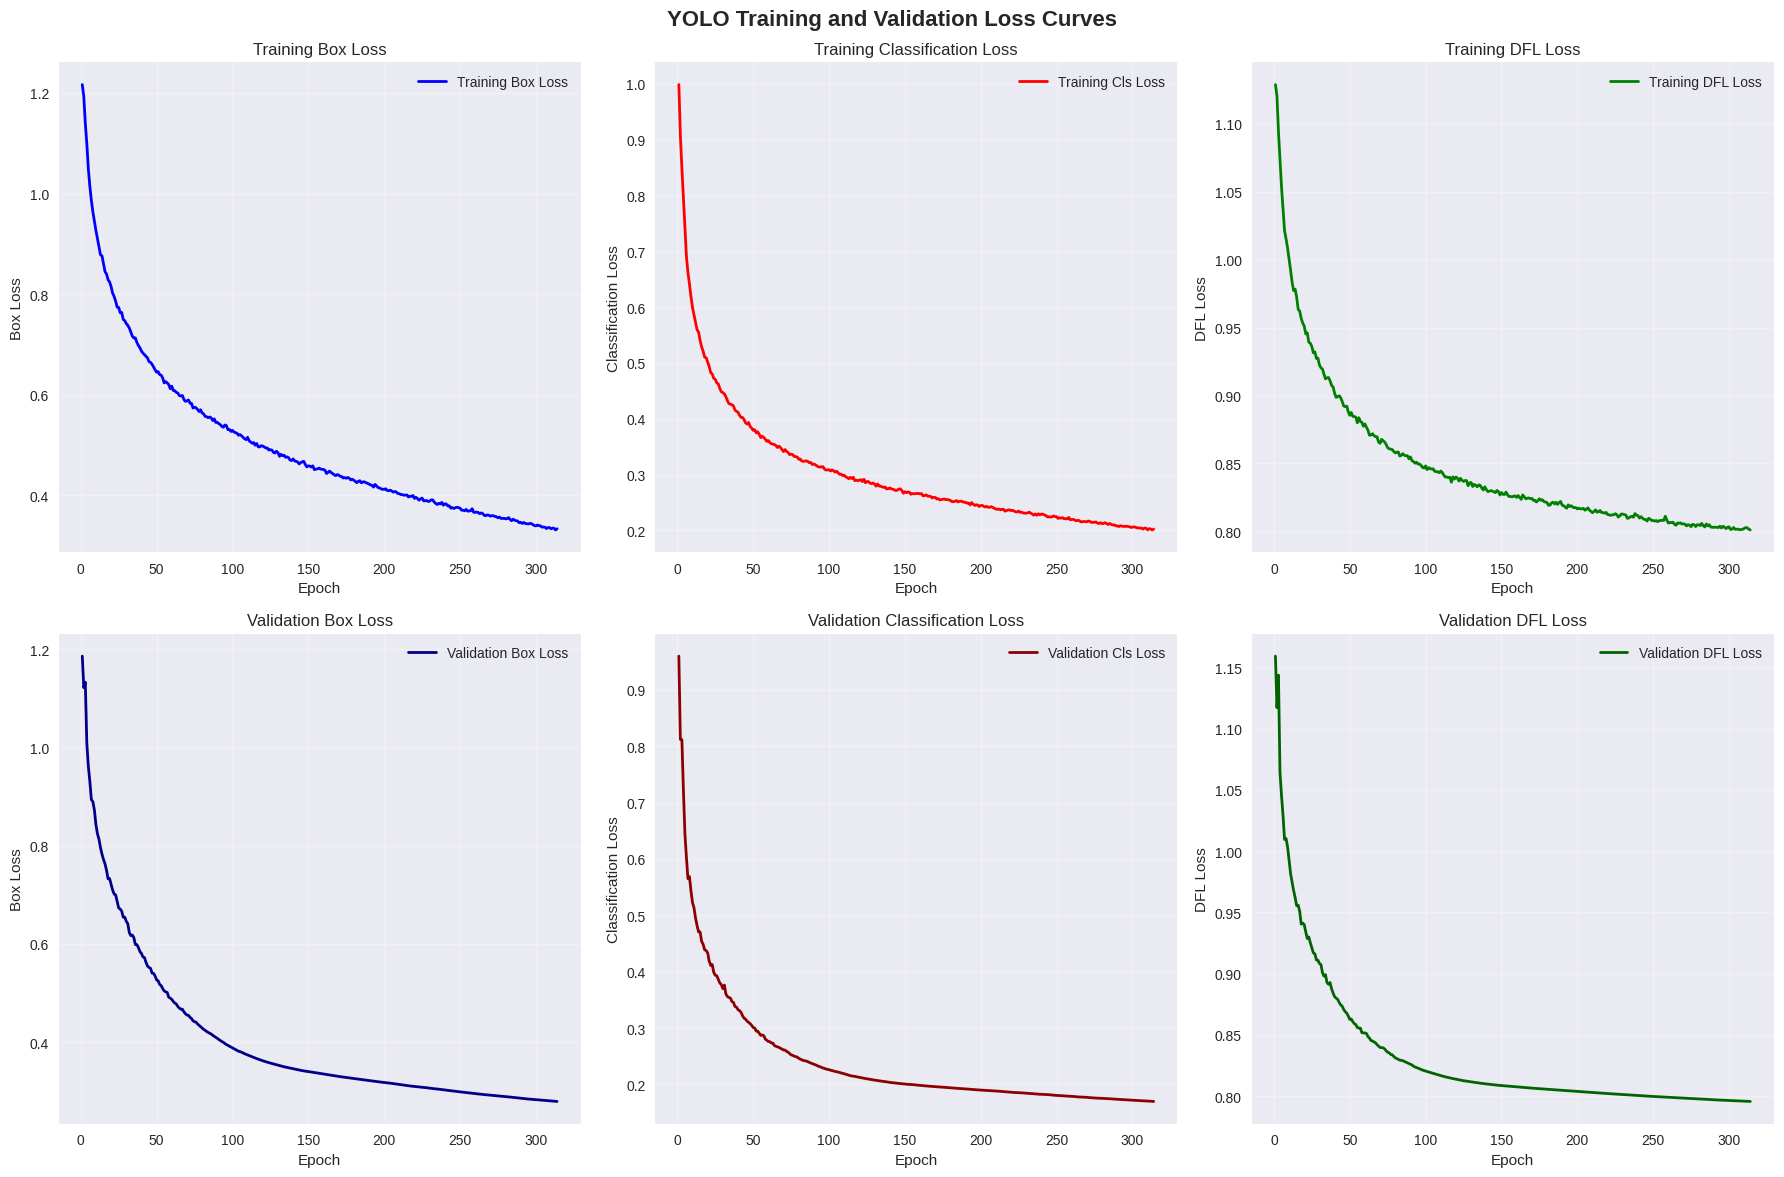


Loss Comparison (Final Values):
Box Loss - Train: 0.3332, Val: 0.2789
Classification Loss - Train: 0.2025, Val: 0.1698
DFL Loss - Train: 0.8011, Val: 0.7957


In [16]:
# Create loss plots with exact column names
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('YOLO Training and Validation Loss Curves', fontsize=16, fontweight='bold')

# Plot 1: Training Box Loss
if 'train/box_loss' in df.columns:
    axes[0, 0].plot(df['epoch'], df['train/box_loss'], label='Training Box Loss', color='blue', linewidth=2)
    axes[0, 0].set_title('Training Box Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Box Loss')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()

# Plot 2: Training Classification Loss
if 'train/cls_loss' in df.columns:
    axes[0, 1].plot(df['epoch'], df['train/cls_loss'], label='Training Cls Loss', color='red', linewidth=2)
    axes[0, 1].set_title('Training Classification Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Classification Loss')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()

# Plot 3: Training DFL Loss
if 'train/dfl_loss' in df.columns:
    axes[0, 2].plot(df['epoch'], df['train/dfl_loss'], label='Training DFL Loss', color='green', linewidth=2)
    axes[0, 2].set_title('Training DFL Loss')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('DFL Loss')
    axes[0, 2].grid(True, alpha=0.3)
    axes[0, 2].legend()

# Plot 4: Validation Box Loss
if 'val/box_loss' in df.columns:
    axes[1, 0].plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss', color='darkblue', linewidth=2)
    axes[1, 0].set_title('Validation Box Loss')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Box Loss')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()

# Plot 5: Validation Classification Loss
if 'val/cls_loss' in df.columns:
    axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='Validation Cls Loss', color='darkred', linewidth=2)
    axes[1, 1].set_title('Validation Classification Loss')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Classification Loss')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()

# Plot 6: Validation DFL Loss
if 'val/dfl_loss' in df.columns:
    axes[1, 2].plot(df['epoch'], df['val/dfl_loss'], label='Validation DFL Loss', color='darkgreen', linewidth=2)
    axes[1, 2].set_title('Validation DFL Loss')
    axes[1, 2].set_xlabel('Epoch')
    axes[1, 2].set_ylabel('DFL Loss')
    axes[1, 2].grid(True, alpha=0.3)
    axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Compare training vs validation losses
print("\nLoss Comparison (Final Values):")
if 'train/box_loss' in df.columns and 'val/box_loss' in df.columns:
    print(f"Box Loss - Train: {df['train/box_loss'].iloc[-1]:.4f}, Val: {df['val/box_loss'].iloc[-1]:.4f}")
if 'train/cls_loss' in df.columns and 'val/cls_loss' in df.columns:
    print(f"Classification Loss - Train: {df['train/cls_loss'].iloc[-1]:.4f}, Val: {df['val/cls_loss'].iloc[-1]:.4f}")
if 'train/dfl_loss' in df.columns and 'val/dfl_loss' in df.columns:
    print(f"DFL Loss - Train: {df['train/dfl_loss'].iloc[-1]:.4f}, Val: {df['val/dfl_loss'].iloc[-1]:.4f}")

## 5. Plot mAP Metrics Over Time

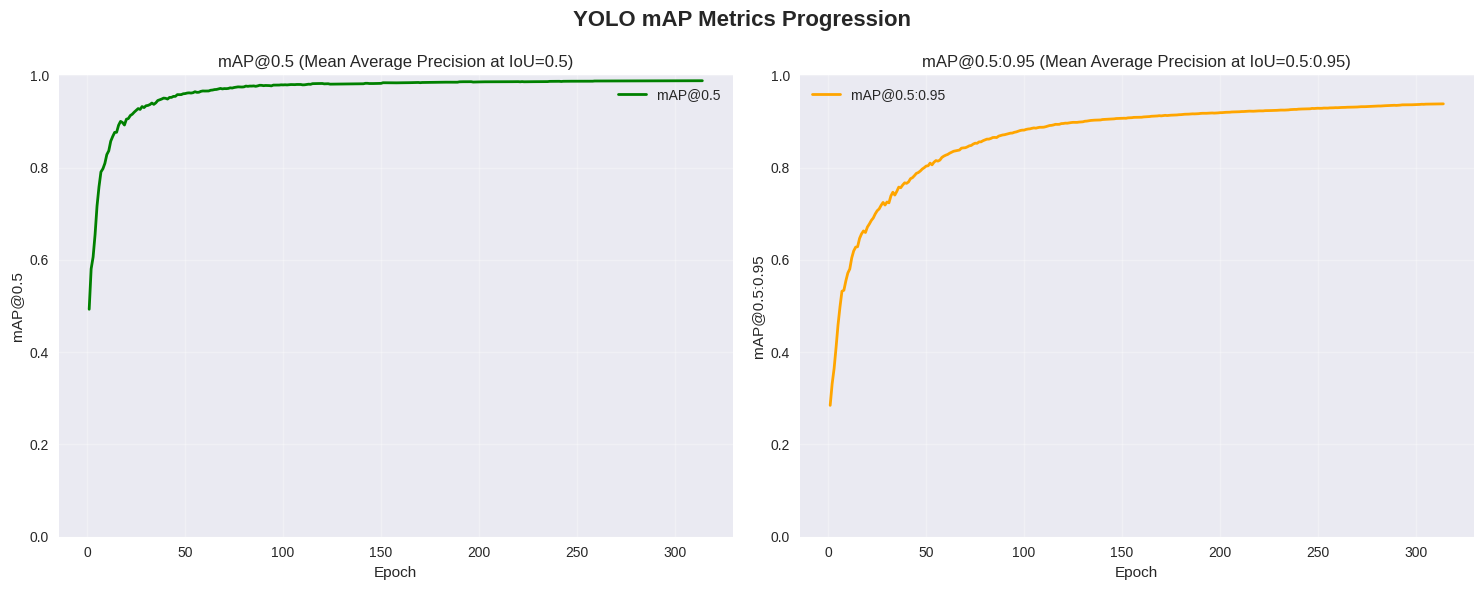

Best mAP Performance:
mAP@0.5: 0.9884 at epoch 313
mAP@0.5:0.95: 0.9382 at epoch 313

Final mAP Performance:
Final mAP@0.5: 0.9883
Final mAP@0.5:0.95: 0.9382


In [17]:
# Create mAP plots using exact column names
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('YOLO mAP Metrics Progression', fontsize=16, fontweight='bold')

# Plot 1: mAP@0.5
if 'metrics/mAP50(B)' in df.columns:
    axes[0].plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5', color='green', linewidth=2)
    axes[0].set_title('mAP@0.5 (Mean Average Precision at IoU=0.5)')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('mAP@0.5')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    axes[0].set_ylim(0, 1)

# Plot 2: mAP@0.5:0.95
if 'metrics/mAP50-95(B)' in df.columns:
    axes[1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', color='orange', linewidth=2)
    axes[1].set_title('mAP@0.5:0.95 (Mean Average Precision at IoU=0.5:0.95)')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('mAP@0.5:0.95')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Print best mAP values
print("Best mAP Performance:")
if 'metrics/mAP50(B)' in df.columns:
    best_map50 = df['metrics/mAP50(B)'].max()
    best_map50_epoch = df.loc[df['metrics/mAP50(B)'].idxmax(), 'epoch']
    print(f"mAP@0.5: {best_map50:.4f} at epoch {best_map50_epoch}")

if 'metrics/mAP50-95(B)' in df.columns:
    best_map50_95 = df['metrics/mAP50-95(B)'].max()
    best_map50_95_epoch = df.loc[df['metrics/mAP50-95(B)'].idxmax(), 'epoch']
    print(f"mAP@0.5:0.95: {best_map50_95:.4f} at epoch {best_map50_95_epoch}")

# Print current (final) mAP values
print(f"\nFinal mAP Performance:")
if 'metrics/mAP50(B)' in df.columns:
    print(f"Final mAP@0.5: {df['metrics/mAP50(B)'].iloc[-1]:.4f}")
if 'metrics/mAP50-95(B)' in df.columns:
    print(f"Final mAP@0.5:0.95: {df['metrics/mAP50-95(B)'].iloc[-1]:.4f}")

## 6. Plot Precision and Recall Curves

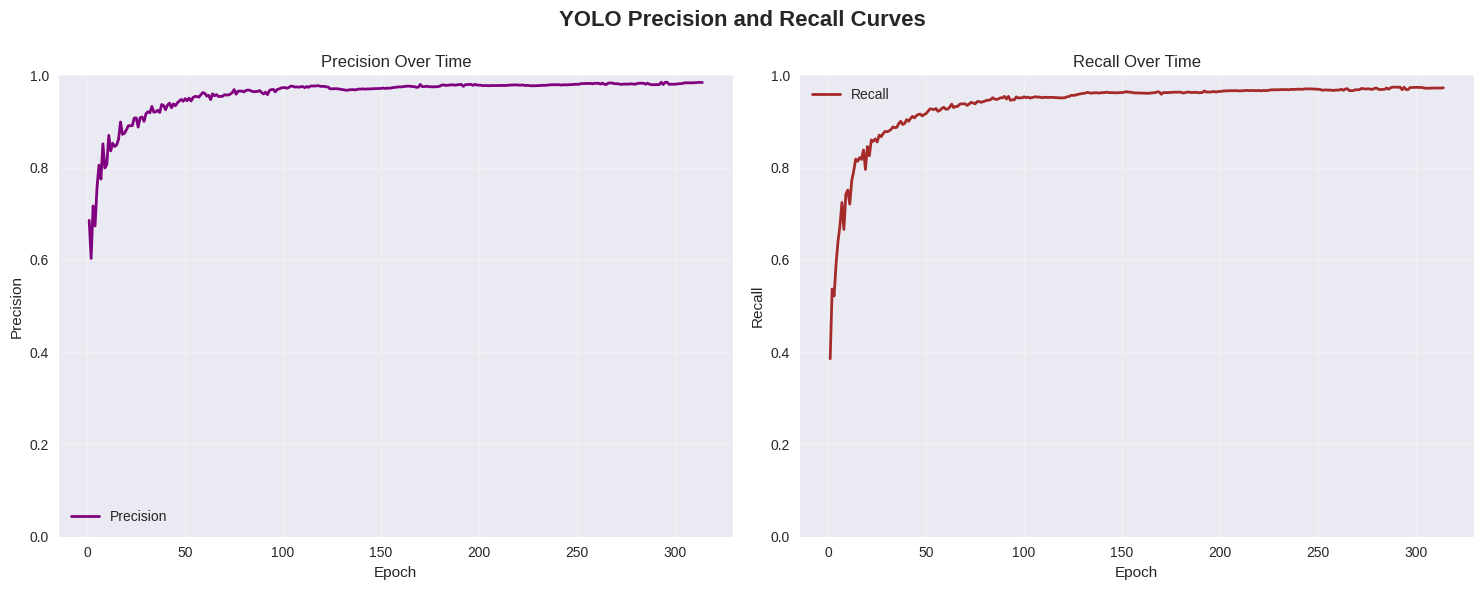

Best Precision and Recall Performance:
Best Precision: 0.9850 at epoch 296
Best Recall: 0.9744 at epoch 289

Final Performance:
Final Precision: 0.9844
Final Recall: 0.9729


In [18]:
# Create Precision and Recall plots using exact column names
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('YOLO Precision and Recall Curves', fontsize=16, fontweight='bold')

# Plot 1: Precision
if 'metrics/precision(B)' in df.columns:
    axes[0].plot(df['epoch'], df['metrics/precision(B)'], label='Precision', color='purple', linewidth=2)
    axes[0].set_title('Precision Over Time')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Precision')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    axes[0].set_ylim(0, 1)

# Plot 2: Recall
if 'metrics/recall(B)' in df.columns:
    axes[1].plot(df['epoch'], df['metrics/recall(B)'], label='Recall', color='brown', linewidth=2)
    axes[1].set_title('Recall Over Time')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Recall')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Print best Precision and Recall values
print("Best Precision and Recall Performance:")
if 'metrics/precision(B)' in df.columns:
    best_precision = df['metrics/precision(B)'].max()
    best_precision_epoch = df.loc[df['metrics/precision(B)'].idxmax(), 'epoch']
    print(f"Best Precision: {best_precision:.4f} at epoch {best_precision_epoch}")

if 'metrics/recall(B)' in df.columns:
    best_recall = df['metrics/recall(B)'].max()
    best_recall_epoch = df.loc[df['metrics/recall(B)'].idxmax(), 'epoch']
    print(f"Best Recall: {best_recall:.4f} at epoch {best_recall_epoch}")

# Print final values
print(f"\nFinal Performance:")
if 'metrics/precision(B)' in df.columns:
    print(f"Final Precision: {df['metrics/precision(B)'].iloc[-1]:.4f}")
if 'metrics/recall(B)' in df.columns:
    print(f"Final Recall: {df['metrics/recall(B)'].iloc[-1]:.4f}")

## 7. Create Comprehensive Training Dashboard

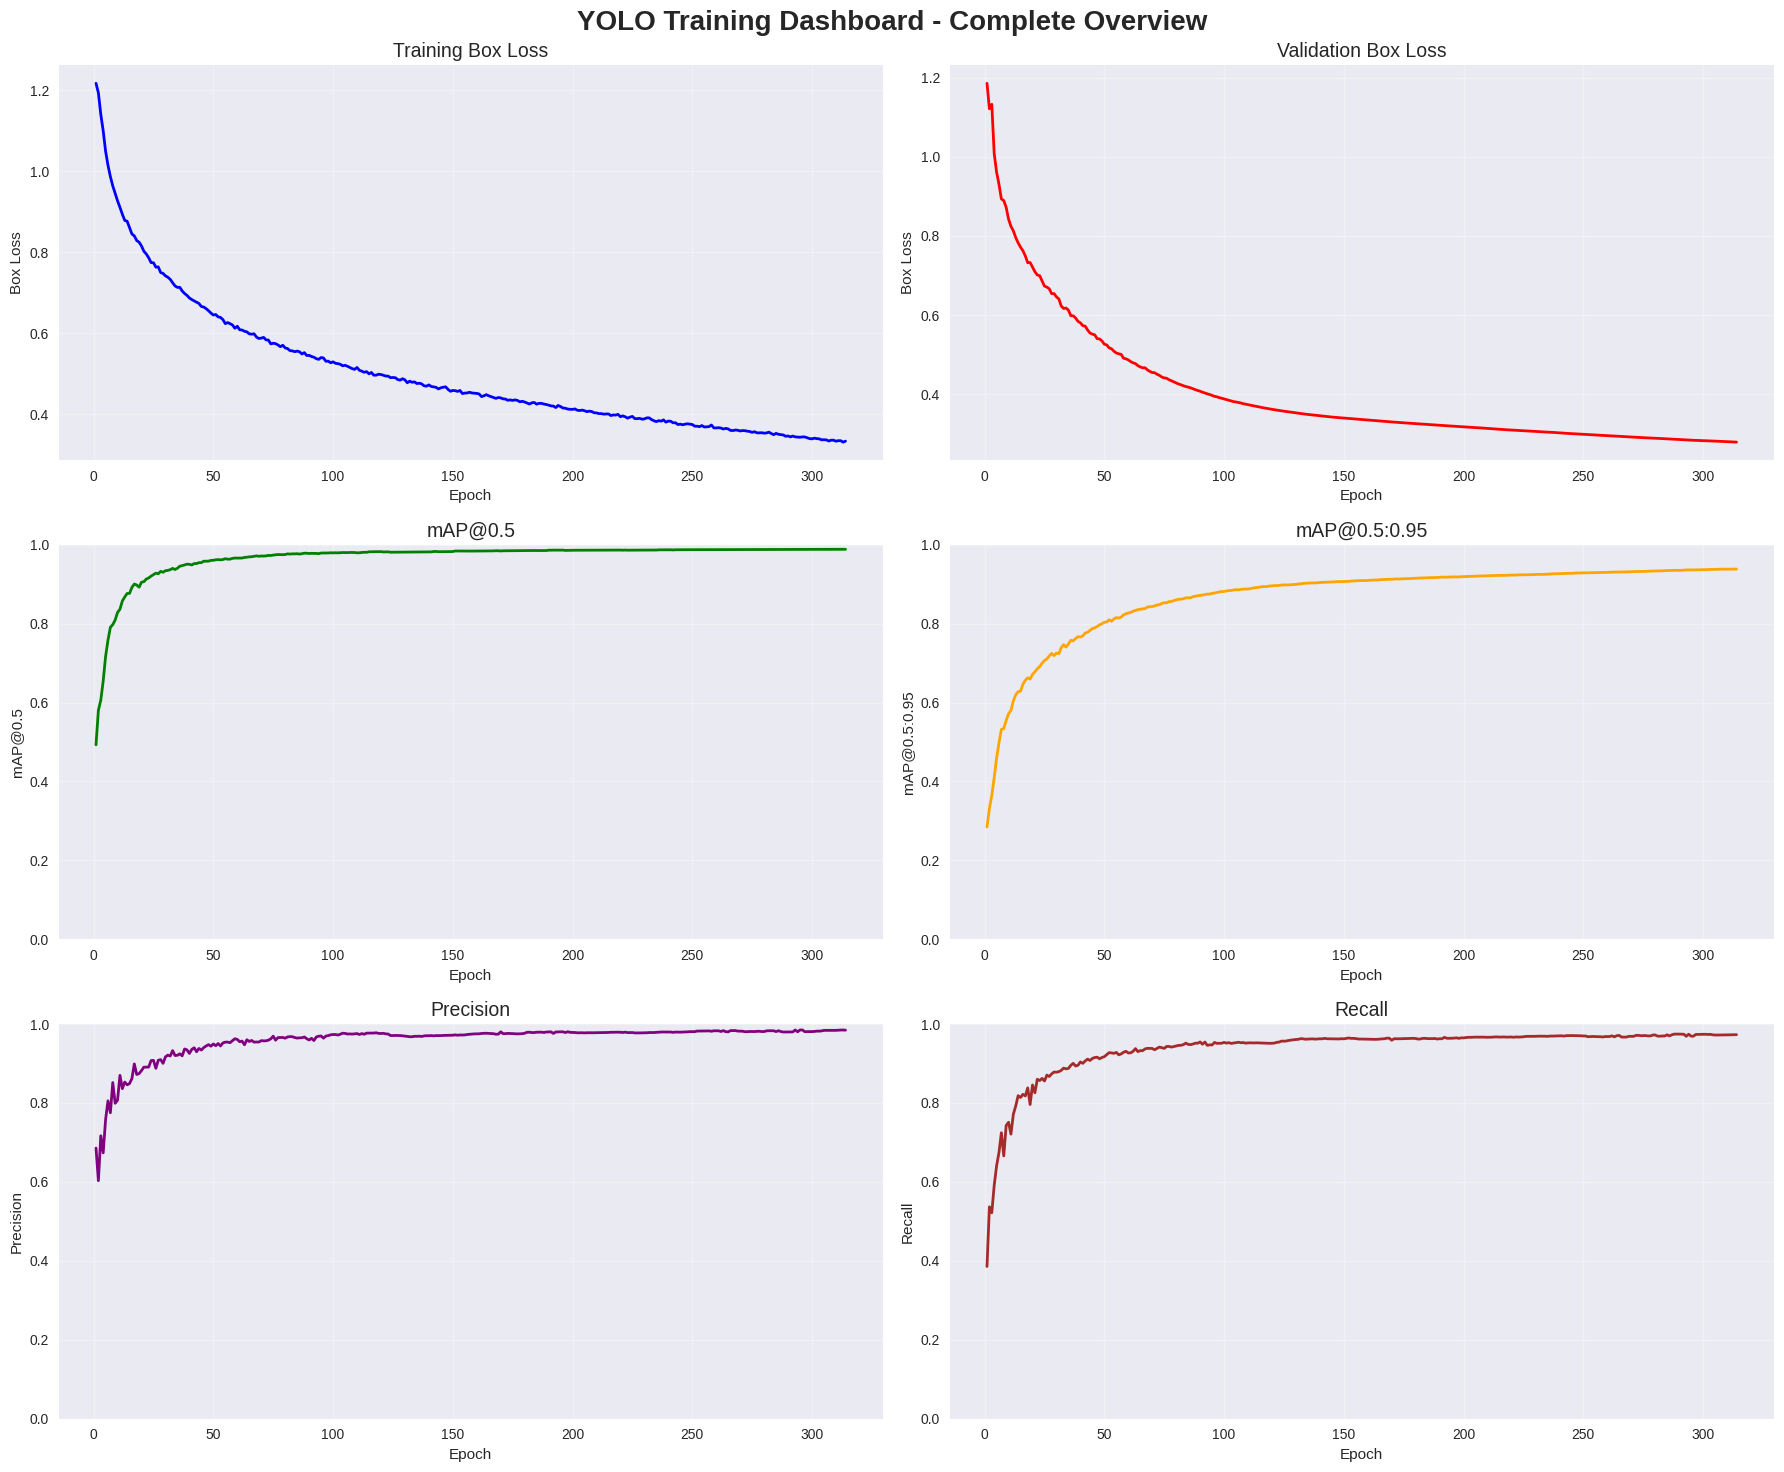


COMPREHENSIVE TRAINING SUMMARY
Total Epochs: 314

Final Loss Values:
Training Box Loss: 0.3332
Validation Box Loss: 0.2789
Training Classification Loss: 0.2025
Validation Classification Loss: 0.1698

Best Performance Achieved:
Best mAP@0.5: 0.9884 at epoch 313
Best mAP@0.5:0.95: 0.9382 at epoch 313
Best Precision: 0.9850 at epoch 296
Best Recall: 0.9744 at epoch 289

Learning Rate Information:
Final Learning Rate (pg0): 0.000314
Final Learning Rate (pg1): 0.000314
Final Learning Rate (pg2): 0.000314


In [19]:
# Create comprehensive training dashboard using exact column names
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('YOLO Training Dashboard - Complete Overview', fontsize=20, fontweight='bold')

# Plot 1: Training Box Loss
if 'train/box_loss' in df.columns:
    axes[0, 0].plot(df['epoch'], df['train/box_loss'], color='blue', linewidth=2)
    axes[0, 0].set_title('Training Box Loss', fontsize=14)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Box Loss')
    axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Validation Box Loss
if 'val/box_loss' in df.columns:
    axes[0, 1].plot(df['epoch'], df['val/box_loss'], color='red', linewidth=2)
    axes[0, 1].set_title('Validation Box Loss', fontsize=14)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Box Loss')
    axes[0, 1].grid(True, alpha=0.3)

# Plot 3: mAP@0.5
if 'metrics/mAP50(B)' in df.columns:
    axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], color='green', linewidth=2)
    axes[1, 0].set_title('mAP@0.5', fontsize=14)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('mAP@0.5')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_ylim(0, 1)

# Plot 4: mAP@0.5:0.95
if 'metrics/mAP50-95(B)' in df.columns:
    axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], color='orange', linewidth=2)
    axes[1, 1].set_title('mAP@0.5:0.95', fontsize=14)
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('mAP@0.5:0.95')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_ylim(0, 1)

# Plot 5: Precision
if 'metrics/precision(B)' in df.columns:
    axes[2, 0].plot(df['epoch'], df['metrics/precision(B)'], color='purple', linewidth=2)
    axes[2, 0].set_title('Precision', fontsize=14)
    axes[2, 0].set_xlabel('Epoch')
    axes[2, 0].set_ylabel('Precision')
    axes[2, 0].grid(True, alpha=0.3)
    axes[2, 0].set_ylim(0, 1)

# Plot 6: Recall
if 'metrics/recall(B)' in df.columns:
    axes[2, 1].plot(df['epoch'], df['metrics/recall(B)'], color='brown', linewidth=2)
    axes[2, 1].set_title('Recall', fontsize=14)
    axes[2, 1].set_xlabel('Epoch')
    axes[2, 1].set_ylabel('Recall')
    axes[2, 1].grid(True, alpha=0.3)
    axes[2, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Print comprehensive training summary
print("\n" + "="*60)
print("COMPREHENSIVE TRAINING SUMMARY")
print("="*60)
print(f"Total Epochs: {len(df)}")

# Loss summary
print(f"\nFinal Loss Values:")
if 'train/box_loss' in df.columns:
    print(f"Training Box Loss: {df['train/box_loss'].iloc[-1]:.4f}")
if 'val/box_loss' in df.columns:
    print(f"Validation Box Loss: {df['val/box_loss'].iloc[-1]:.4f}")
if 'train/cls_loss' in df.columns:
    print(f"Training Classification Loss: {df['train/cls_loss'].iloc[-1]:.4f}")
if 'val/cls_loss' in df.columns:
    print(f"Validation Classification Loss: {df['val/cls_loss'].iloc[-1]:.4f}")

# Best performance summary
print(f"\nBest Performance Achieved:")
if 'metrics/mAP50(B)' in df.columns:
    best_map50 = df['metrics/mAP50(B)'].max()
    best_map50_epoch = df.loc[df['metrics/mAP50(B)'].idxmax(), 'epoch']
    print(f"Best mAP@0.5: {best_map50:.4f} at epoch {best_map50_epoch}")

if 'metrics/mAP50-95(B)' in df.columns:
    best_map50_95 = df['metrics/mAP50-95(B)'].max()
    best_map50_95_epoch = df.loc[df['metrics/mAP50-95(B)'].idxmax(), 'epoch']
    print(f"Best mAP@0.5:0.95: {best_map50_95:.4f} at epoch {best_map50_95_epoch}")

if 'metrics/precision(B)' in df.columns:
    best_precision = df['metrics/precision(B)'].max()
    best_precision_epoch = df.loc[df['metrics/precision(B)'].idxmax(), 'epoch']
    print(f"Best Precision: {best_precision:.4f} at epoch {best_precision_epoch}")

if 'metrics/recall(B)' in df.columns:
    best_recall = df['metrics/recall(B)'].max()
    best_recall_epoch = df.loc[df['metrics/recall(B)'].idxmax(), 'epoch']
    print(f"Best Recall: {best_recall:.4f} at epoch {best_recall_epoch}")

# Learning rate info
print(f"\nLearning Rate Information:")
if 'lr/pg0' in df.columns:
    print(f"Final Learning Rate (pg0): {df['lr/pg0'].iloc[-1]:.6f}")
if 'lr/pg1' in df.columns:
    print(f"Final Learning Rate (pg1): {df['lr/pg1'].iloc[-1]:.6f}")
if 'lr/pg2' in df.columns:
    print(f"Final Learning Rate (pg2): {df['lr/pg2'].iloc[-1]:.6f}")

## 8.1. Learning Rate Visualization

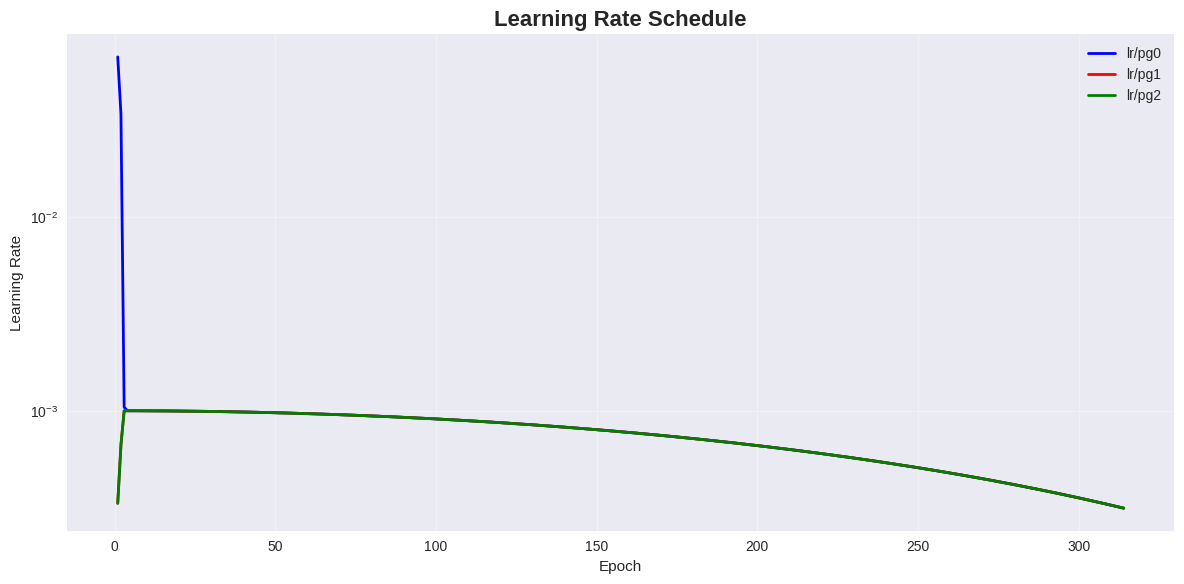

Learning Rate Summary:
lr/pg0:
  Initial: 0.067044
  Final: 0.000314
  Max: 0.067044
  Min: 0.000314

lr/pg1:
  Initial: 0.000333
  Final: 0.000314
  Max: 0.001000
  Min: 0.000314

lr/pg2:
  Initial: 0.000333
  Final: 0.000314
  Max: 0.001000
  Min: 0.000314



In [20]:
# Create learning rate visualization
lr_cols = ['lr/pg0', 'lr/pg1', 'lr/pg2']
available_lr_cols = [col for col in lr_cols if col in df.columns]

if available_lr_cols:
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    colors = ['blue', 'red', 'green']
    for i, col in enumerate(available_lr_cols):
        ax.plot(df['epoch'], df[col], label=col, color=colors[i], linewidth=2)
    
    ax.set_title('Learning Rate Schedule', fontsize=16, fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Learning Rate')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_yscale('log')  # Log scale for better visualization
    
    plt.tight_layout()
    plt.show()
    
    # Print learning rate summary
    print("Learning Rate Summary:")
    for col in available_lr_cols:
        initial_lr = df[col].iloc[0]
        final_lr = df[col].iloc[-1]
        max_lr = df[col].max()
        min_lr = df[col].min()
        print(f"{col}:")
        print(f"  Initial: {initial_lr:.6f}")
        print(f"  Final: {final_lr:.6f}")
        print(f"  Max: {max_lr:.6f}")
        print(f"  Min: {min_lr:.6f}")
        print()
else:
    print("No learning rate columns found in the dataset.")

## 8.2. Training vs Validation Loss Comparison

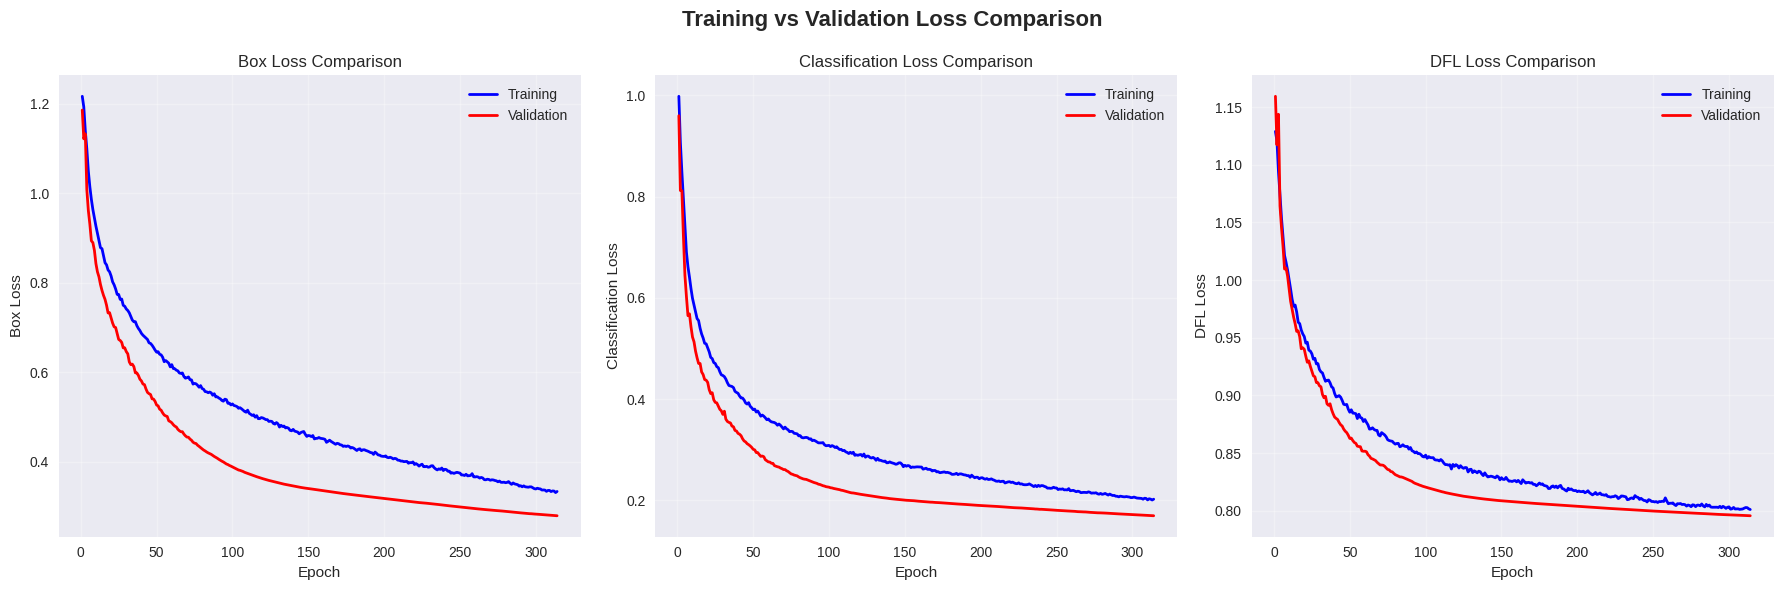

Overfitting Analysis:

Box Loss:
  Final Training Loss: 0.3332
  Final Validation Loss: 0.2789
  Gap: -0.0543 (-16.3%)
  ✅ Good generalization

Classification Loss:
  Final Training Loss: 0.2025
  Final Validation Loss: 0.1698
  Gap: -0.0327 (-16.2%)
  ✅ Good generalization

DFL Loss:
  Final Training Loss: 0.8011
  Final Validation Loss: 0.7957
  Gap: -0.0054 (-0.7%)
  ✅ Good generalization


In [21]:
# Create side-by-side comparison of training vs validation losses
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Training vs Validation Loss Comparison', fontsize=16, fontweight='bold')

# Box Loss Comparison
if 'train/box_loss' in df.columns and 'val/box_loss' in df.columns:
    axes[0].plot(df['epoch'], df['train/box_loss'], label='Training', color='blue', linewidth=2)
    axes[0].plot(df['epoch'], df['val/box_loss'], label='Validation', color='red', linewidth=2)
    axes[0].set_title('Box Loss Comparison')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Box Loss')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()

# Classification Loss Comparison
if 'train/cls_loss' in df.columns and 'val/cls_loss' in df.columns:
    axes[1].plot(df['epoch'], df['train/cls_loss'], label='Training', color='blue', linewidth=2)
    axes[1].plot(df['epoch'], df['val/cls_loss'], label='Validation', color='red', linewidth=2)
    axes[1].set_title('Classification Loss Comparison')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Classification Loss')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()

# DFL Loss Comparison
if 'train/dfl_loss' in df.columns and 'val/dfl_loss' in df.columns:
    axes[2].plot(df['epoch'], df['train/dfl_loss'], label='Training', color='blue', linewidth=2)
    axes[2].plot(df['epoch'], df['val/dfl_loss'], label='Validation', color='red', linewidth=2)
    axes[2].set_title('DFL Loss Comparison')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('DFL Loss')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()

plt.tight_layout()
plt.show()

# Calculate and display overfitting indicators
print("Overfitting Analysis:")
print("="*40)

loss_pairs = [
    ('train/box_loss', 'val/box_loss', 'Box Loss'),
    ('train/cls_loss', 'val/cls_loss', 'Classification Loss'),
    ('train/dfl_loss', 'val/dfl_loss', 'DFL Loss')
]

for train_col, val_col, loss_name in loss_pairs:
    if train_col in df.columns and val_col in df.columns:
        train_final = df[train_col].iloc[-1]
        val_final = df[val_col].iloc[-1]
        gap = val_final - train_final
        gap_percentage = (gap / train_final) * 100 if train_final > 0 else 0
        
        print(f"\n{loss_name}:")
        print(f"  Final Training Loss: {train_final:.4f}")
        print(f"  Final Validation Loss: {val_final:.4f}")
        print(f"  Gap: {gap:.4f} ({gap_percentage:.1f}%)")
        
        if gap_percentage > 20:
            print(f"  ⚠️  Significant overfitting detected!")
        elif gap_percentage > 10:
            print(f"  ⚠️  Moderate overfitting detected")
        else:
            print(f"  ✅ Good generalization")

## Conclusion

This notebook provides a comprehensive analysis of the YOLO training results. Key insights:

### Training Performance
- **Loss Curves**: Monitor convergence and identify overfitting
- **mAP Metrics**: Evaluate detection accuracy at different IoU thresholds
- **Precision/Recall**: Assess detection quality and completeness

### Next Steps
1. **Model Evaluation**: Use the best performing weights for inference
2. **Hyperparameter Tuning**: Adjust learning rate, batch size, or augmentation based on curves
3. **Data Analysis**: Examine failure cases and consider dataset improvements
4. **Deployment**: Export the model for production use

### Files Generated
- Training plots saved to: `/home/carlier1/Documents/yolo11/training_plots/`
- Best model weights: `/home/carlier1/Documents/yolo11/runs/detect/kitti_yolo11x/weights/best.pt`

The analysis shows the model's learning progression and helps identify optimal training parameters for future experiments.